In [1]:
import math 
import numpy as np

## 定义加噪函数

$\mathrm{SNR}=10 \times \log _{10}\left(\frac{P_{S}}{P_{N}}\right) | p_s 为信号强度， P_N为噪音强度$

In [2]:
# clean是干净的信号np.array, snr是信噪比
def AddNoisy(clean, snr):
    x = clean
    Nx = len(x)  # 求出信号的长度
    noise = np.random.randn(Nx)# 用randn产生正态分布随机数 
    signal_power = np.sum(x*x)/Nx# 求信号的平均能量
    noise_power = np.sum(noise*noise)/Nx# 求信号的平均能量
    noise_variance = signal_power/(math.pow(10., (snr/10)))#计算噪声设定的方差值
    noise = math.sqrt(noise_variance/noise_power)*noise# 按照噪声能量构成相应的白噪声
    y=x+noise
    return y

In [3]:
AddNoisy(np.array([1.,2.,3.,4.]), -10)

array([-8.29967506, 13.96881495, -4.66618154,  7.39015824])

## 读取数据集

In [4]:
import os
import matplotlib.pyplot as plt

### 添加单个snr

In [5]:
# 定义要加噪的信号比
snr = +1

In [6]:
path = r"C:\Users\bbfss\Desktop\file\Code\github\Denoising-CNN\Denoising-CNN_2.0\dataset"
filenames = []
# 读取dataset文件夹下的干净信号txt
filenames = os.listdir(os.path.join(path,"clean_signal","干净信号txt"))
filenames.sort(key = lambda x: int(x[0:-4]))
clean_signal = []
for filename in filenames:
    clean_signal.append(np.loadtxt(os.path.join(path,"clean_signal","干净信号txt", filename)))
# 初始化文件夹
os.makedirs(os.path.join(path, "带噪信号txt"), exist_ok=True)
ls = os.listdir(os.path.join(path, "带噪信号txt"))
for item in ls:
    os.remove(os.path.join(path,"带噪信号txt", item))   
os.makedirs(os.path.join(path, "干净信号txt"), exist_ok=True)
ls = os.listdir(os.path.join(path, "干净信号txt"))
for item in ls:
    os.remove(os.path.join(path,"干净信号txt", item))
    

index = 0
for signal in clean_signal:
    index += 1
    noisy = AddNoisy(signal, snr)
    
    with open(os.path.join(path, "带噪信号txt")+"//"+ str(index)+".txt", mode='w') as f:
        f.truncate()
        for item in noisy:
            print(format(item, '.8f'), file=f)
            
    with open(os.path.join(path, "干净信号txt")+"//"+ str(index)+".txt", mode='w') as f:
        f.truncate()
        for item in signal:
            print(format(item, '.8f'), file=f)

给真实信号也加一个噪

In [31]:
path = r"C:\Users\bbfss\Desktop\file\Code\github\Denoising-CNN\Denoising-CNN_2.0\dataset"
filenames = []
# 读取dataset文件夹下的干净信号txt
filenames = os.listdir(os.path.join(path,"clean_signal","真实信号txt"))
filenames.sort(key = lambda x: int(x[0:-4]))
clean_signal = []
for filename in filenames:
    clean_signal.append(np.loadtxt(os.path.join(path,"clean_signal","真实信号txt", filename)))
# 初始化文件夹
os.makedirs(os.path.join(path, "带噪信号txt"), exist_ok=True)
os.makedirs(os.path.join(path, "干净信号txt"), exist_ok=True)

for signal in clean_signal:
    signal = signal[:2001]
    index += 1
    noisy = AddNoisy(signal, snr)
    with open(os.path.join(path, "带噪信号txt")+"//"+ str(index)+".txt", mode='w') as f:
        f.truncate()
        for item in noisy:
            print(format(item, '.8f'), file=f)
            
    with open(os.path.join(path, "干净信号txt")+"//"+ str(index)+".txt", mode='w') as f:
        f.truncate()
        for item in signal:
            print(format(item, '.8f'), file=f)

### 添加多个snr，混杂一起(CBDNet准备)

In [6]:
path = r"C:\Users\bbfss\Desktop\file\Code\github\Denoising-CNN\Denoising-CNN_2.0\dataset"
filenames = []
# 读取dataset文件夹下的干净信号txt
filenames = os.listdir(os.path.join(path,"clean_signal","干净信号txt"))
filenames.sort(key = lambda x: int(x[0:-4]))
clean_signal = []
for filename in filenames:
    clean_signal.append(np.loadtxt(os.path.join(path,"clean_signal","干净信号txt", filename)))

    
# 初始化文件夹
os.makedirs(os.path.join(path, "带噪信号txt"), exist_ok=True)
ls = os.listdir(os.path.join(path, "带噪信号txt"))
for item in ls:
    os.remove(os.path.join(path,"带噪信号txt", item))   
os.makedirs(os.path.join(path, "干净信号txt"), exist_ok=True)
ls = os.listdir(os.path.join(path, "干净信号txt"))
for item in ls:
    os.remove(os.path.join(path,"干净信号txt", item))
    
index = 0
for snr in range(-6, 0):
    for signal in clean_signal:
        index += 1
        noisy = AddNoisy(signal, snr)

        os.makedirs(os.path.join(path, "带噪信号txt"), exist_ok=True)
        with open(os.path.join(path, "带噪信号txt")+"//"+ str(index)+".txt", mode='w') as f:
            f.truncate()
            for item in noisy:
                print(format(item, '.8f'), file=f)
        # 输出匹配的干净信号
        os.makedirs(os.path.join(path, "干净信号txt"), exist_ok=True)
        with open(os.path.join(path, "干净信号txt")+"//"+ str(index)+".txt", mode='w') as f:
            f.truncate()
            for item in signal:
                print(format(item, '.8f'), file=f)

## 看看效果

['1.txt', '10.txt', '100.txt', '1000_-9.txt', '1001_-9.txt', '1002_-9.txt', '1003_-9.txt', '1004_-9.txt', '1005_-8.txt', '1006_-8.txt', '1007_-8.txt', '1008_-8.txt', '1009_-8.txt', '100_-10.txt', '101.txt', '1010_-8.txt', '1011_-8.txt', '1012_-8.txt', '1013_-8.txt', '1014_-8.txt', '1015_-8.txt', '1016_-8.txt', '1017_-8.txt', '1018_-8.txt', '1019_-8.txt', '101_-10.txt', '102.txt', '1020_-8.txt', '1021_-8.txt', '1022_-8.txt', '1023_-8.txt', '1024_-8.txt', '1025_-8.txt', '1026_-8.txt', '1027_-8.txt', '1028_-8.txt', '1029_-8.txt', '102_-10.txt', '103.txt', '1030_-8.txt', '1031_-8.txt', '1032_-8.txt', '1033_-8.txt', '1034_-8.txt', '1035_-8.txt', '1036_-8.txt', '1037_-8.txt', '1038_-8.txt', '1039_-8.txt', '103_-10.txt', '104.txt', '1040_-8.txt', '1041_-8.txt', '1042_-8.txt', '1043_-8.txt', '1044_-8.txt', '1045_-8.txt', '1046_-8.txt', '1047_-8.txt', '1048_-8.txt', '1049_-8.txt', '104_-10.txt', '105.txt', '1050_-8.txt', '1051_-8.txt', '1052_-8.txt', '1053_-8.txt', '1054_-8.txt', '1055_-8.txt',

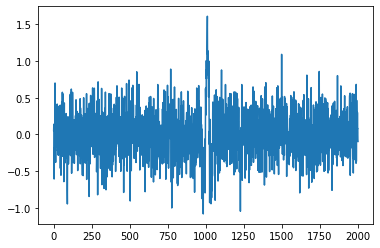

In [8]:
def GetSignal(path, num):
    filenames = os.listdir(path)
    filename = filenames[num]
    plt.plot(np.loadtxt(os.path.join(path, filename)))

path = r"C:\Users\bbfss\Desktop\file\Code\github\Denoising-CNN\Denoising-CNN_2.0\dataset\带噪信号txt"
GetSignal(path, 420)
print(os.listdir(path))

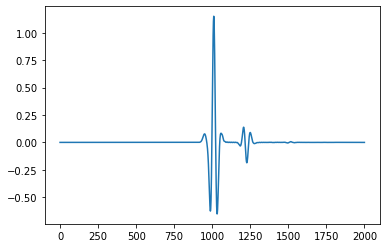

In [9]:
path = r"C:\Users\bbfss\Desktop\file\Code\github\Denoising-CNN\Denoising-CNN_2.0\dataset\干净信号txt"
GetSignal(path, 420)

In [10]:
path = r"C:/Users/bbfss/Desktop/file/Code/github/Denoising-CNN/Denoising-CNN_2.0/dataset/clean_signal/干净信号txt"
path_save = r"C:/Users/bbfss/Desktop/file/Code/github/Denoising-CNN/Denoising-CNN_2.0/dataset/svg_clean"
for i in range(500):
    GetSignal(path, i)
    os.makedirs(path_save, exist_ok=True)
    plt.savefig(os.path.join(path_save, "{}.svg".format(i)))
    plt.clf()

<Figure size 432x288 with 0 Axes>